In [1]:
!which python

/home/utente/bahamas_test/bin/python


In [2]:
import yaml 
import corner
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# This is the configuration file
config_file = '../template/config.yaml'
with open(config_file, 'r') as file:
    config = yaml.safe_load(file)
    
print("We are using the following configuration:")
print(yaml.dump(config, default_flow_style=False))

We are using the following configuration:
T: 31557600.0
dt: 10
f1: 0.0001
f2: 0.029
file: ../data/data_whittle
fileAV: ../data/data_gamma
folder_plot: ../data/
gen2: true
inference:
  adapt_matrix: true
  beta: 1
  chain_method: parallel
  chains: 1
  file: ../data/data_gamma
  file_post: ../data/result_gamma.npz
  likelihood: Gamma
  sampler: NUTS
  samples: 6000
  warmup: 1000
mod: log
nseg: 1000
response_num: true



In [19]:
# This is the sources file
sources_file = '../template/pe_galaxy_stat.yaml'
with open(sources_file, 'r') as file:
    sources = yaml.safe_load(file)

print("We are using the following sources:")
print(yaml.dump(sources, default_flow_style=False))

#Extract injected parameters
par = []
for key in sources['sources']: 
    # Extract the injected parameters
    for i in range(len(sources['sources'][key])):
        print(f"Injected parameter {i}: {sources['sources'][key][i]['injected']}")
        par.append(sources['sources'][key][i]['injected'])
# Convert to numpy array
par = np.array(par)
  


We are using the following sources:
sources:
  extra_DWD:
  - bounds:
    - -12
    - -8
    injected: -10.76
    name: a
  - bounds:
    - 2
    - 6
    injected: 4.18
    name: b
  - bounds:
    - -1
    - 2
    injected: 0.741
    name: gamma1
  - bounds:
    - -2
    - 2
    injected: -0.255
    name: gamma2
  instr_noise:
  - bounds:
    - 1
    - 5
    injected: 2.4
    name: A
  - bounds:
    - 3
    - 10
    injected: 7.9
    name: P

Injected parameter 0: -10.76
Injected parameter 1: 4.18
Injected parameter 2: 0.741
Injected parameter 3: -0.255
Injected parameter 0: 2.4
Injected parameter 1: 7.9


In [20]:
!bahamas_data --config ../template/config.yaml --sources ../template/pe_galaxy_stat.yaml

/home/utente/anaconda3/lib/python3.9/pty.py:85: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


2025-06-24 10:46:22,265 - BAHAMAS - INFO - Using JAX backend.
2025-06-24 10:46:22,265 - BAHAMAS - INFO - np is from: jax.numpy
2025-06-24 10:46:27,267 - BAHAMAS - INFO - Production of full resolution series
2025-06-24 10:46:54,284 - BAHAMAS - INFO - Data saved in ../data/data_whittle.h5 and ../data/data_gamma.h5
2025-06-24 10:46:54,285 - BAHAMAS - INFO - Plotting signals.
2025-06-24 10:47:10,356 - BAHAMAS - INFO - SNR of extra_DWD: 858
2025-06-24 10:47:10,356 - BAHAMAS - INFO - Processing completed.


In [21]:
!bahamas_inference --config ../template/config.yaml --sources ../template/pe_galaxy_stat.yaml

2025-06-24 10:50:45,114 - BAHAMAS - INFO - Using JAX backend.
2025-06-24 10:50:45,114 - BAHAMAS - INFO - np is from: jax.numpy
2025-06-24 10:50:50,113 - BAHAMAS - INFO - JAX devices available: [CpuDevice(id=0)]
2025-06-24 10:50:50,114 - BAHAMAS - INFO - Running inference with config: ../template/config.yaml and sources: ../template/pe_galaxy_stat.yaml
2025-06-24 10:50:50,114 - BAHAMAS - INFO - Running inference...
2025-06-24 10:50:50,124 - BAHAMAS - INFO - Number of chunks: 1
sample: 100%|█| 7000/7000 [00:17<00:00, 395.13it/s, 7 steps of size 1.00e-01. ac
2025-06-24 10:51:16,685 - BAHAMAS - INFO - Inference completed successfully.
2025-06-24 10:51:16,685 - BAHAMAS - INFO - Results saved to: ../data/result_gamma.npz


Posterior samples loaded from: {'chain': {'extra_DWD_a': Array([-10.770988, -10.770366, -10.760115, ..., -10.761739, -10.761261,
       -10.762045], dtype=float32), 'extra_DWD_b': Array([4.964815 , 4.9325476, 5.0932026, ..., 2.256947 , 4.208534 ,
       4.0628734], dtype=float32), 'extra_DWD_gamma1': Array([0.72295   , 0.7106521 , 0.73406947, ..., 0.73864794, 0.7333062 ,
       0.7299251 ], dtype=float32), 'extra_DWD_gamma2': Array([-0.19305159, -0.1812741 , -0.19385257, ..., -0.24599227,
       -0.26961985, -0.2621773 ], dtype=float32), 'instr_noise_A': Array([2.399365 , 2.4006538, 2.4015844, ..., 2.3923128, 2.399709 ,
       2.4001153], dtype=float32), 'instr_noise_P': Array([7.901487 , 7.8992586, 7.906176 , ..., 7.8966203, 7.899393 ,
       7.900065 ], dtype=float32), 'log_likelihood': Array([79225.836, 79226.61 , 79226.22 , ..., 79227.484, 79225.664,
       79226.42 ], dtype=float32), 'beta': 1}, 'autocorr': array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
 

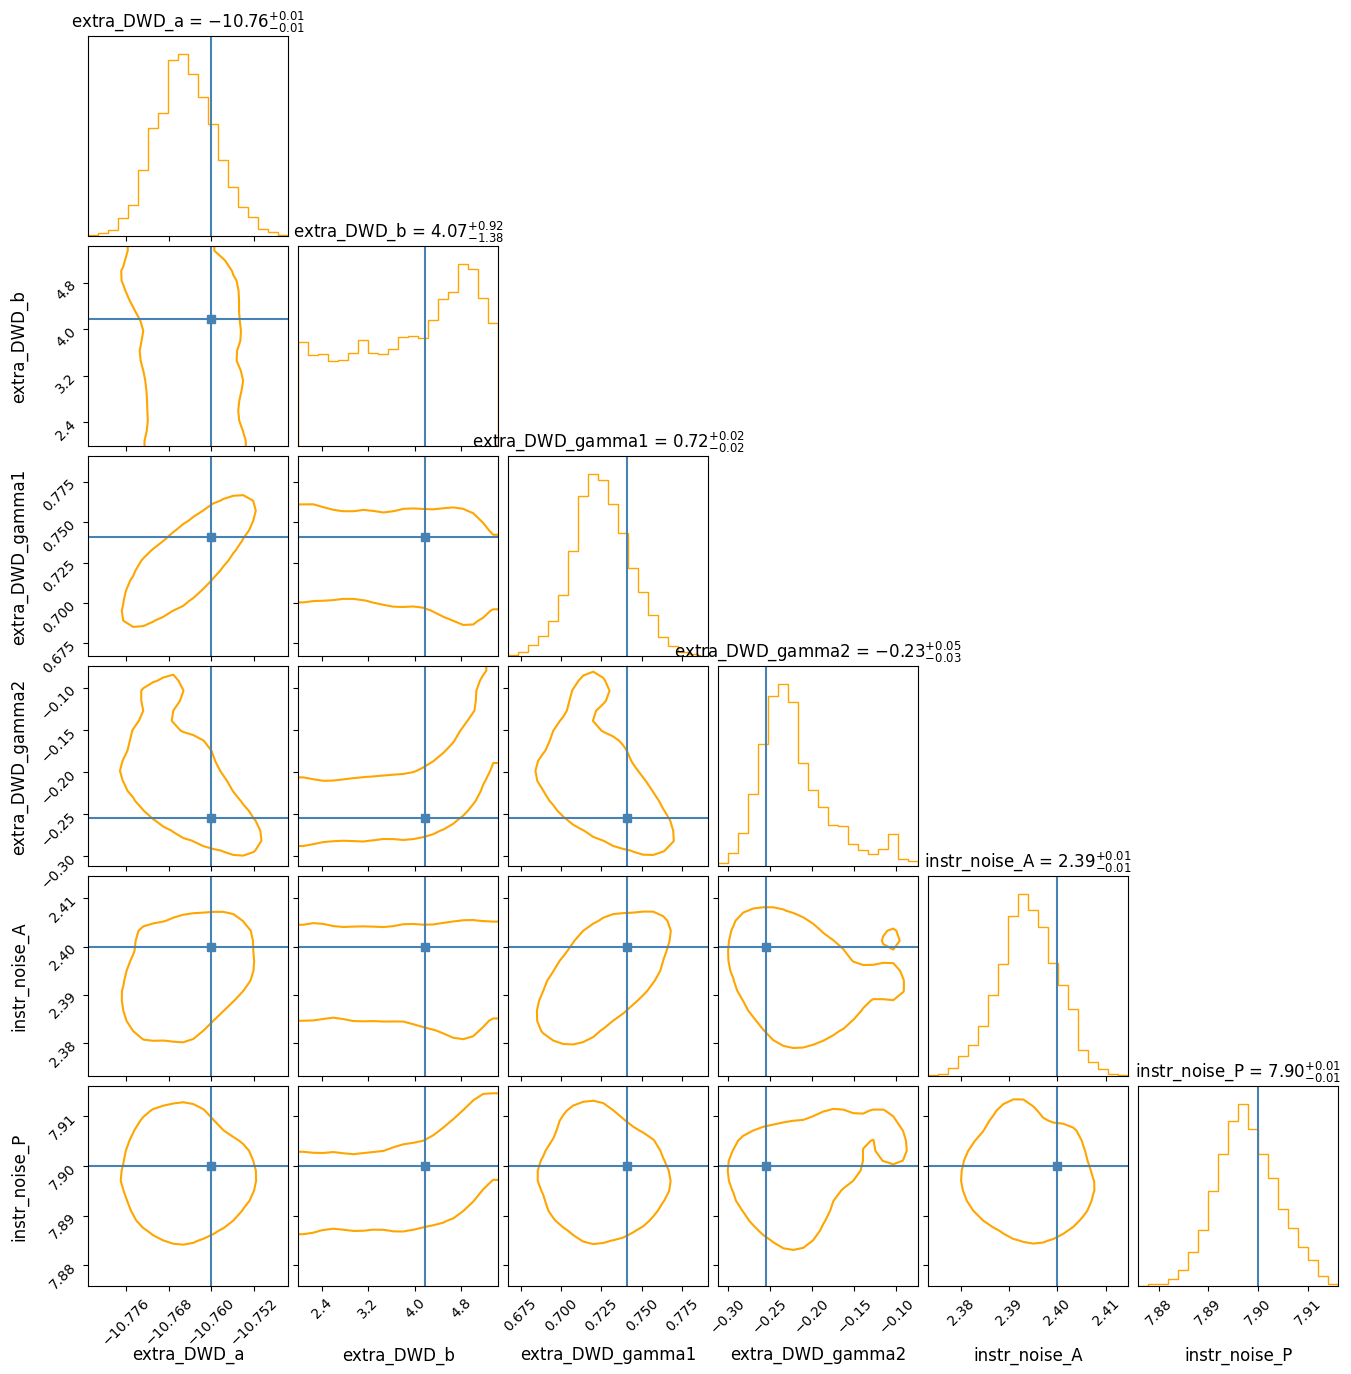

In [29]:
import corner

# Load the results from the inference
results = config['inference']['file_post']
posterior = np.load(results, allow_pickle=True)['posterior'][()]
print("Posterior samples loaded from:", posterior)

param_names = []
param_values = []


for key in posterior['chain'].keys():
  
    if key == 'log_likelihood':
        break
    else:
        param_names.append(key)
        param_values.append(posterior['chain'][key])
print("Parameters found in the posterior:", param_names)
# Stack the parameters into an array for corner
samples = np.vstack(param_values).T  # Shape: (n_samples, n_params)

# Plot corner plo
figure = corner.corner(samples, labels=param_names, show_titles=True, smooth=True, truths=par,color = 'orange', levels=[0.9],
                plot_datapoints=False, plot_contours=True, plot_density=False, fill_contours=False, 
                title_kwargs={"fontsize": 12}, label_kwargs={"fontsize": 12})

plt.show()